In [2]:
import cv2
import matplotlib.pyplot as plt

### Define Image Path:

Here, we set the path variable to the location of the input image

In [4]:
# Path to image file
path = './datasets/dog.jpg'

### Read and Display Original Image 

cv2.imread(path): Reads the image specified by the path

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)): Plots the origial image. Since OpenCV provides image in BGR and the Matplotlib expects image in RBG formate, the images needs to be converted in order for plt.show() to show original image. 

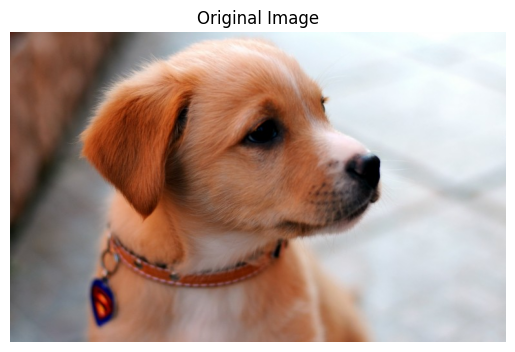

In [ ]:
image = cv2.imread(path)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  
plt.title('Original Image')
plt.show()


### Convert to Grayscale

cv2.cvtColor(image, cv2.COLOR_BGR2GRAY): Converts the color image to grayscale. This is a crucial step for sketch conversion as sketches are typically monochrome.

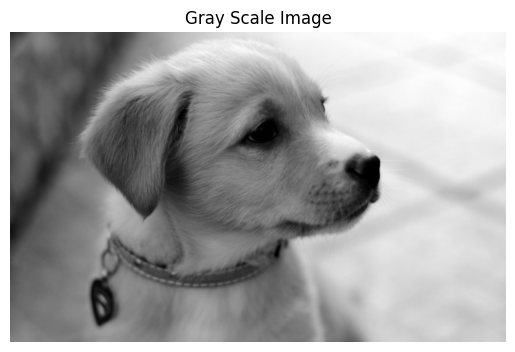

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')  
plt.title('Gray Scale Image')
plt.show()


### Invert the Grayscale Image
255 - gray_image: Inverts the pixel values of the grayscale image. Dark areas become light, and light areas become dark. This step creates a negative of the grayscale image

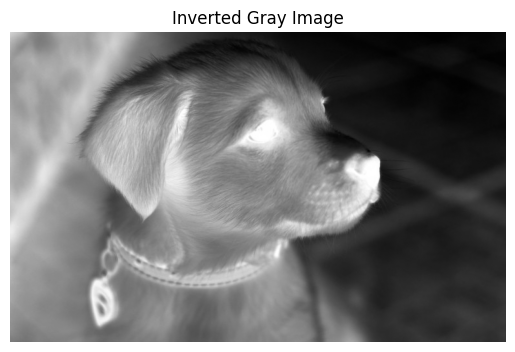

In [ ]:
inverted_image = 255 - gray_image
plt.imshow(inverted_image, cmap='gray')
plt.axis('off')  
plt.title('Inverted Gray Image')
plt.show()


### Blur the Inverted Image

cv2.GaussianBlur(inverted_image, (121, 121), sigmaX=0, sigmaY=0): Applies a Gaussian blur to the inverted image. The (121, 121) is the kernel size, which determines the amount of blur. A larger kernel size results in more blur. sigmaX and sigmaY are standard deviations in X and Y directions, set to 0 to be calculated from the kernel size. This blurring step is essential to soften the edges, which is characteristic of a pencil sketch.

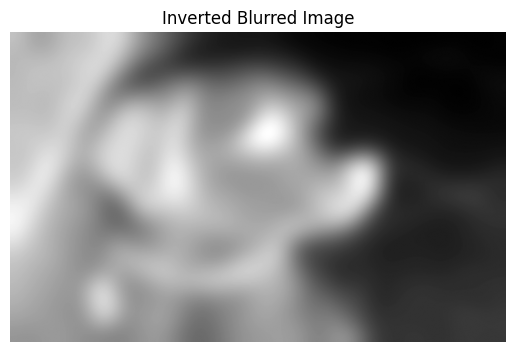

In [ ]:
blurred = cv2.GaussianBlur(inverted_image, (121, 121), sigmaX=0, sigmaY=0)
plt.imshow(blurred, cmap='gray')
plt.axis('off')  
plt.title('Inverted Blurred Image')
plt.show()


### Create the Pencil Sketch

cv2.divide(gray_image, 255 - blurred, scale=240): This is the core operation for creating the sketch effect. It divides the grayscale image by the inverted and blurred image.

255 - blurred: Inverts the blurred image again.

The division brightens areas where the original grayscale image is light and the blurred inverted image is dark, and darkens areas where both are similar. The scale=240 parameter scales the result of the division, which helps in achieving the desired contrast for a sketch.

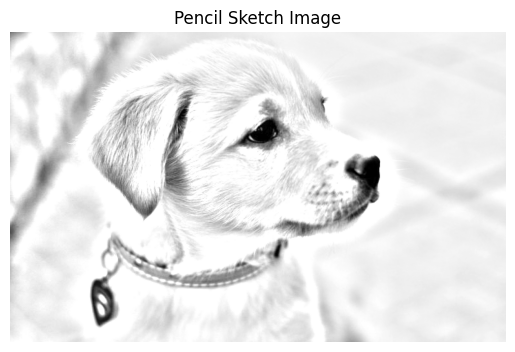

In [ ]:
sketch = cv2.divide(gray_image, 255 - blurred, scale=240)
plt.imshow(sketch, cmap='gray')
plt.axis('off')  
plt.title('Pencil Sketch Image')
plt.show()
